In [27]:
from atc_toolbox.test_suite.accessor import get_df
from preprocessor import TimeSeriesPreprocessor
from models import LSTM
from trainer import train
import test

In [2]:
msft = get_df('MSFT')
date_index = msft.index
msft

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2000-01-03,2000-01-03,58.687500,59.312500,56.000000,58.281250,36.861530,53228400
2000-01-04,2000-01-04,56.781250,58.562500,56.125000,56.312500,35.616337,54119000
2000-01-05,2000-01-05,55.562500,58.187500,54.687500,56.906250,35.991879,64059600
2000-01-06,2000-01-06,56.093750,56.937500,54.187500,55.000000,34.786213,54976600
2000-01-07,2000-01-07,54.312500,56.125000,53.656250,55.718750,35.240807,62013600
...,...,...,...,...,...,...,...
2020-12-24,2020-12-24,221.419998,223.610001,221.199997,222.750000,221.302505,10550600
2020-12-28,2020-12-28,224.449997,226.029999,223.020004,224.960007,223.498123,17933500
2020-12-29,2020-12-29,226.309998,227.179993,223.580002,224.149994,222.693390,17403200


In [7]:
tsp = TimeSeriesPreprocessor(window=10, test_ratio=0.2)
tsp.process(msft)

In [11]:
lstm = LSTM(num_classes=1, input_size=1, hidden_size=2, num_layers=1)

In [12]:
import torch
torch.cuda.is_available()

False

In [13]:
train(lstm, tsp.trainX, tsp.trainY, num_epochs=2000, learning_rate=0.01)

Epoch: 0, loss: 0.00079
Epoch: 100, loss: 0.00002
Epoch: 200, loss: 0.00002
Epoch: 300, loss: 0.00002
Epoch: 400, loss: 0.00001
Epoch: 500, loss: 0.00001
Epoch: 600, loss: 0.00001
Epoch: 700, loss: 0.00001
Epoch: 800, loss: 0.00001
Epoch: 900, loss: 0.00001
Epoch: 1000, loss: 0.00001
Epoch: 1100, loss: 0.00001
Epoch: 1200, loss: 0.00001
Epoch: 1300, loss: 0.00001
Epoch: 1400, loss: 0.00001
Epoch: 1500, loss: 0.00001
Epoch: 1600, loss: 0.00001
Epoch: 1700, loss: 0.00001
Epoch: 1800, loss: 0.00001
Epoch: 1900, loss: 0.00001


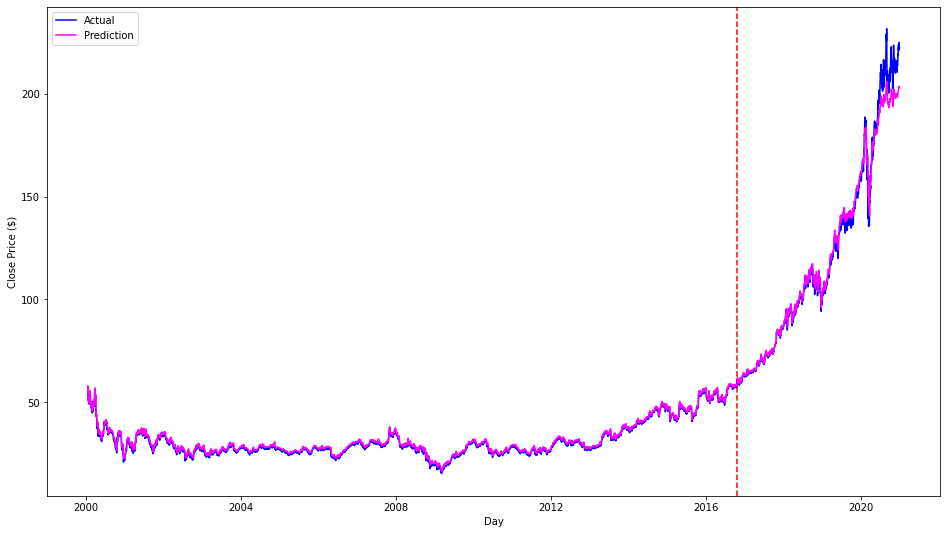

In [31]:
import importlib
importlib.reload(test)

date_index_adj = date_index[tsp.window:]

mapper = lambda i: date_index_adj[i]

test.test(lstm, tsp.X, tsp.Y, tsp.train_size, tsp.scaler, mapper) # since window=10